# DECISION TREE ALGORITHM

<font color='grey'>__Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
The decisions or the test are performed on the basis of features of the given dataset.
It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.__</font>

## POKEMON ANALYSIS AND THEN IMPLEMENT THE ALGO TO PREDICT THE VALUES 

<font color='grey'>Extract the data from the DataSet and then clean the data and drop the useless columns and null values and then find the realtion between the speed, defence and the attack for the water and fire pokemon respectively.</font>

In [116]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [4]:
poke = pd.read_csv('pokemonn.csv')

In [5]:
poke.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [18]:
poke.rename(columns={'type1' : 'Primary_Type','type2':'Secondary_Type'},inplace=True) 

In [19]:
poke.head()

,sp_defense,speed,Primary_Type,Secondary_Type,is_legendary,generation,sp_attack
0,65,45,grass,poison,0,1,65
1,80,60,grass,poison,0,1,80
2,120,80,grass,poison,0,1,122
3,50,65,fire,NaN,0,1,60
4,65,80,fire,NaN,0,1,80


In [21]:
grass_pokemon=poke[poke['Primary_Type']=='Grass']

In [22]:
grass_pokemon.head()

,sp_defense,speed,Primary_Type,Secondary_Type,is_legendary,generation,sp_attack


In [28]:
water_pokemon=poke[poke['Primary_Type']=='water']

In [29]:
water_pokemon.head()

,sp_defense,speed,Primary_Type,Secondary_Type,is_legendary,generation,sp_attack
6,64,43,water,NaN,0,1,50
7,80,58,water,NaN,0,1,65
8,115,78,water,NaN,0,1,135
53,50,55,water,NaN,0,1,65
54,80,85,water,NaN,0,1,95


In [30]:
fire_pokemon=poke[poke['Primary_Type']=='fire']

In [31]:
fire_pokemon.head()

,sp_defense,speed,Primary_Type,Secondary_Type,is_legendary,generation,sp_attack
3,50,65,fire,NaN,0,1,60
4,65,80,fire,NaN,0,1,80
5,115,100,fire,flying,0,1,159
36,65,65,fire,ice,0,1,50
37,100,109,fire,ice,0,1,81


Check the shape of every pokemon means how many values are present for each pokemon

In [33]:
poke.shape

(801, 7)

In [34]:
grass_pokemon.shape

(0, 7)

In [36]:
water_pokemon.shape

(114, 7)

In [37]:
fire_pokemon.shape

(52, 7)

In [38]:
(114+0+52)/801

0.20724094881398253

In [39]:
water_pokemon.head()

,sp_defense,speed,Primary_Type,Secondary_Type,is_legendary,generation,sp_attack
6,64,43,water,NaN,0,1,50
7,80,58,water,NaN,0,1,65
8,115,78,water,NaN,0,1,135
53,50,55,water,NaN,0,1,65
54,80,85,water,NaN,0,1,95


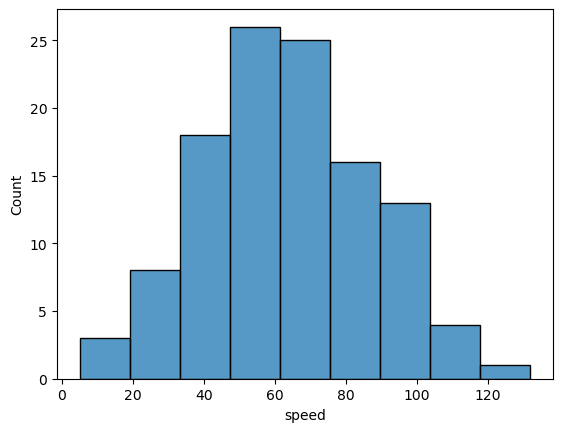

In [40]:
# for numerical distribution, use histogram
sns.histplot(water_pokemon['speed'])
plt.show()

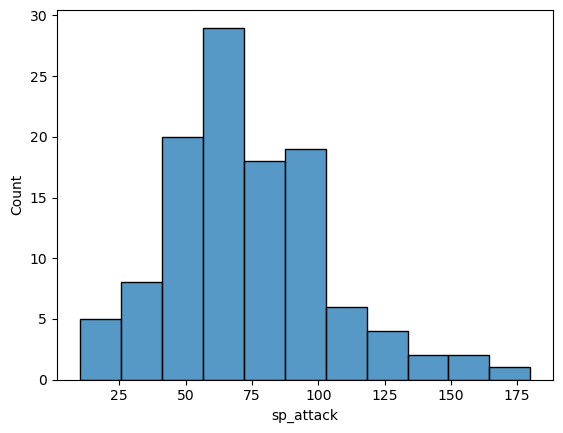

In [41]:
sns.histplot(water_pokemon['sp_attack'])
plt.show()

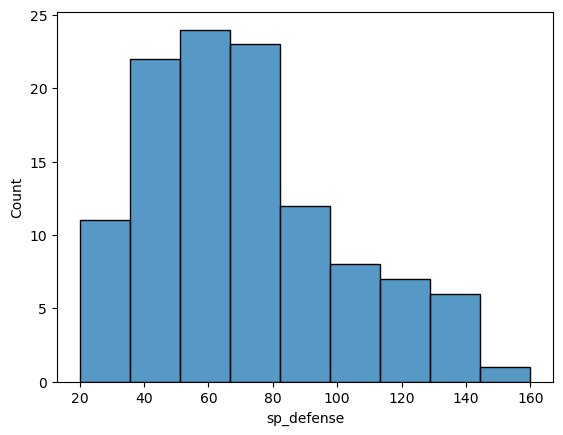

In [44]:
sns.histplot(water_pokemon['sp_defense'])
plt.show()

In [45]:
water_pokemon.describe()

,sp_defense,speed,is_legendary,generation,sp_attack
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,71.798246,63.921053,0.052632,3.210526,74.061404
std,29.577012,23.758052,0.224283,1.869521,29.825536
min,20.000000,5.000000,0.000000,1.000000,10.000000
25%,50.000000,46.250000,0.000000,2.000000,53.000000
50%,67.500000,64.000000,0.000000,3.000000,70.000000
75%,89.750000,80.750000,0.000000,5.000000,90.750000
max,160.000000,132.000000,1.000000,7.000000,180.000000


In [46]:
fire_pokemon.head()

,sp_defense,speed,Primary_Type,Secondary_Type,is_legendary,generation,sp_attack
3,50,65,fire,NaN,0,1,60
4,65,80,fire,NaN,0,1,80
5,115,100,fire,flying,0,1,159
36,65,65,fire,ice,0,1,50
37,100,109,fire,ice,0,1,81


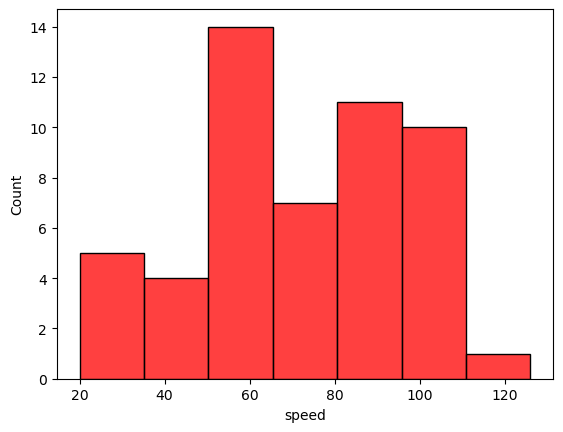

In [53]:
sns.histplot(fire_pokemon['speed'], color='red')
plt.show()

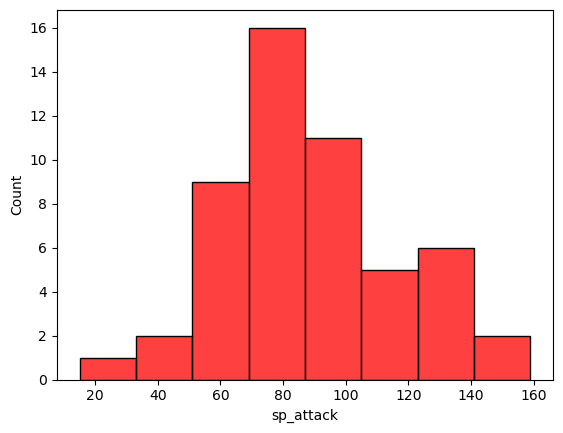

In [54]:
sns.histplot(fire_pokemon['sp_attack'], color='red')
plt.show()

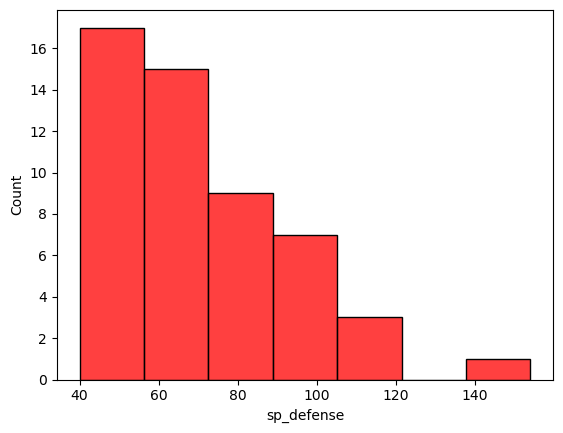

In [55]:
sns.histplot(fire_pokemon['sp_defense'], color='red')
plt.show()

In [56]:
fire_pokemon.describe()

,sp_defense,speed,is_legendary,generation,sp_attack
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,71.538462,73.346154,0.096154,3.634615,87.730769
std,23.200289,25.177709,0.297678,2.096017,28.247586
min,40.000000,20.000000,0.000000,1.000000,15.000000
25%,52.000000,60.000000,0.000000,2.000000,70.000000
50%,66.000000,72.500000,0.000000,3.500000,83.000000
75%,85.000000,93.000000,0.000000,5.250000,104.250000
max,154.000000,126.000000,1.000000,7.000000,159.000000


In [57]:
water_pokemon.describe()

,sp_defense,speed,is_legendary,generation,sp_attack
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,71.798246,63.921053,0.052632,3.210526,74.061404
std,29.577012,23.758052,0.224283,1.869521,29.825536
min,20.000000,5.000000,0.000000,1.000000,10.000000
25%,50.000000,46.250000,0.000000,2.000000,53.000000
50%,67.500000,64.000000,0.000000,3.000000,70.000000
75%,89.750000,80.750000,0.000000,5.000000,90.750000
max,160.000000,132.000000,1.000000,7.000000,180.000000


In [58]:
poke.head()

,sp_defense,speed,Primary_Type,Secondary_Type,is_legendary,generation,sp_attack
0,65,45,grass,poison,0,1,65
1,80,60,grass,poison,0,1,80
2,120,80,grass,poison,0,1,122
3,50,65,fire,NaN,0,1,60
4,65,80,fire,NaN,0,1,80


In [76]:
poke['is_legendary'].value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

In [77]:
70/731

0.09575923392612859

# IMPLEMENTING THE DECISION TREE CLASSIFIER

In [78]:
x = poke[['speed']]

In [79]:
y = poke[['is_legendary']]

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dtc = DecisionTreeClassifier()

In [86]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [87]:
y_pred = dtc.predict(x_test)

In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
confusion_matrix(y_test, y_pred)

array([[211,   7],
       [ 21,   2]], dtype=int64)

In [91]:
#Accuracy
(211+2)/(211+7+21+2)

0.8838174273858921

In [92]:
## Now we implement Regression MOdel

In [93]:
poke.head()

,sp_defense,speed,Primary_Type,Secondary_Type,is_legendary,generation,sp_attack
0,65,45,grass,poison,0,1,65
1,80,60,grass,poison,0,1,80
2,120,80,grass,poison,0,1,122
3,50,65,fire,NaN,0,1,60
4,65,80,fire,NaN,0,1,80


# Implementing the Regression Model using Decision Tree

In [102]:
x = poke[['sp_defense']]

In [103]:
y = poke[['sp_attack']]

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [134]:
from sklearn.tree import DecisionTreeRegressor

In [136]:
dtr = DecisionTreeRegressor()

In [137]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [138]:
y_predict=dtr.predict(x_test)

In [139]:
y_test.head()

,sp_attack
337,55
455,49
244,90
762,50
369,40


In [140]:
y_predict[0:5]

array([ 61.78571429,  60.5       , 103.85714286, 131.        ,
        61.78571429])

In [141]:
from sklearn.metrics import mean_squared_error

In [142]:
mean_squared_error(y_test,y_predict)

844.8715513608886